## Author: Previn Pillay
### Date: July 12 2025

# World Layoffs 2020 - 2023

The purpose of this project is to showcase my data cleaning, analysis and visualization skills on the R programming platform.

### About the Dataset

The dataset that I used was sourced through a Google search and therefore data integrity and credibility is a risk.

### Findings and Conclusions

Let's assume that the dataset is credible. My findings include:

-   The total layoffs between 2020 - 2023 was 383,089. The highest number of layoffs occurred in the year 2022 with 160,591. However, the month with the highest number of layoffs occurred in the month of January 2023 with approx 85,000.

-   The highest number of layoffs in a company was 18,150. There were 301 companies above the average layoff number of 237 layoffs.

-   Industries that contributed to the most layoffs between 2020 - 2023 were the Consumer and Retail industries with 11.8% and 11.4% respectively.

-   The country that experienced the highest number of layoffs was the United States, as it contributed to over half of the total layoffs. However, the country with the highest average layoffs was the Netherlands.

-   The city that experienced the highest number of layoffs was the SF (San Francisco) Bay Area from the United States, which also contributed to nearly half of the United States layoffs.

To conclude, the drastic number of layoffs could be due to certain world events that took place during or even before the periods of 2020 - 2023. Even though this data wasn't collected specifically for looking at company layoffs because of Covid-19, it is in reason to say that Covid-19 was a major cause for layoffs due to social distancing restrictions. The fact that the Retail and Consumer industries which relies on face-to-face interaction contributed to over 20% of the total layoffs supports my theory. The United States most likely faced a few more factors along with Covid-19, for example, the high cost of living in certain states and cities. The San Francisco Bay Area being a city with a very high cost of living would have definitely been affected as companies in that area wouldn't have been able to survive without daily business. Therefore, making it the highest city with 125,631 layoffs.

## Processing Data

### Loading Packages

In [1]:
library(tidyverse)
library(dplyr)
library(readxl)
library(ggplot2)
library(lubridate)
library(sf)
library(ggthemes)
library(RColorBrewer)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE



### Importing Dataset

In [2]:
layoffs <- read_excel("/kaggle/input/world-layoffs-2020-2023/layoffs.xls")

Warning message:
“Expecting date in F2358 / R2358C6: got 'NULL'”


### Preview Dataset

In [3]:
summary(layoffs)
head(layoffs)
glimpse(layoffs)

   company            location           industry         total_laid_off    
 Length:2361        Length:2361        Length:2361        Length:2361       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 percentage_laid_off      date                           stage          
 Length:2361         Min.   :2020-03-11 00:00:00.00   Length:2361       
 Class :character    1st Qu.:2020-08-19 18:00:00.00   Class :character  
 Mode  :character    Median :2022-08-01 00:00:00.00   Mode  :character  
                     Mean   :2022-02-02 23:38:02.02                     
                   

company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>
Atlassian,Sydney,Other,500,0.050000000000000003,2023-03-06,Post-IPO,Australia,210
SiriusXM,New York City,Media,475,0.080000000000000002,2023-03-06,Post-IPO,United States,525
Alerzo,Ibadan,Retail,400,NULL,2023-03-06,Series B,Nigeria,16
UpGrad,Mumbai,Education,120,NULL,2023-03-06,Unknown,India,631
Loft,Sao Paulo,Real Estate,340,0.14999999999999999,2023-03-03,Unknown,Brazil,788
Embark Trucks,SF Bay Area,Transportation,230,0.69999999999999996,2023-03-03,Post-IPO,United States,317


Rows: 2,361
Columns: 9
$ company               <chr> "Atlassian", "SiriusXM", "Alerzo", "UpGrad", "Lo…
$ location              <chr> "Sydney", "New York City", "Ibadan", "Mumbai", "…
$ industry              <chr> "Other", "Media", "Retail", "Education", "Real E…
$ total_laid_off        <chr> "500", "475", "400", "120", "340", "230", "100",…
$ percentage_laid_off   <chr> "0.050000000000000003", "0.080000000000000002", …
$ date                  <dttm> 2023-03-06, 2023-03-06, 2023-03-06, 2023-03-06,…
$ stage                 <chr> "Post-IPO", "Post-IPO", "Series B", "Unknown", "…
$ country               <chr> "Australia", "United States", "Nigeria", "India"…
$ funds_raised_millions <chr> "210", "525", "16", "631", "788", "317", "59", "…


### Pull and Merge Dataset

In [4]:
layoffs_subset <- layoffs%>%
  select(company, location, industry, date, country, total_laid_off)

glimpse(layoffs_subset)

Rows: 2,361
Columns: 6
$ company        <chr> "Atlassian", "SiriusXM", "Alerzo", "UpGrad", "Loft", "E…
$ location       <chr> "Sydney", "New York City", "Ibadan", "Mumbai", "Sao Pau…
$ industry       <chr> "Other", "Media", "Retail", "Education", "Real Estate",…
$ date           <dttm> 2023-03-06, 2023-03-06, 2023-03-06, 2023-03-06, 2023-0…
$ country        <chr> "Australia", "United States", "Nigeria", "India", "Braz…
$ total_laid_off <chr> "500", "475", "400", "120", "340", "230", "100", "63", …


## Clean Data

### Check for null, blanks and duplicate values

In [5]:
sum(is.na(layoffs_subset))

layoffs_subset %>%
  filter(company == "Airbnb")

layoffs_subset %>%
  filter(company == "Juul")

layoffs_subset %>%
  filter(company == "Blackbaud")

layoffs_subset %>%
  filter(company == "Carvana")

sum(is.null(layoffs_subset))

sum(duplicated(layoffs_subset))
layoffs_subset[duplicated(layoffs_subset) | duplicated(layoffs_subset, fromLast = TRUE), ]

[1] 4

company,location,industry,date,country,total_laid_off
<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>
Airbnb,SF Bay Area,NA,2023-03-03,United States,30
Airbnb,SF Bay Area,Travel,2020-05-05,United States,1900


company,location,industry,date,country,total_laid_off
<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>
Juul,SF Bay Area,NA,2022-11-10,United States,400
Juul,SF Bay Area,Consumer,2020-05-05,United States,900


company,location,industry,date,country,total_laid_off
<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>
Blackbaud,Charleston,Other,NA,United States,500


company,location,industry,date,country,total_laid_off
<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>
Carvana,Phoenix,Transportation,2023-01-13,United States,NULL
Carvana,Phoenix,Transportation,2022-11-18,United States,1500
Carvana,Phoenix,NA,2022-05-10,United States,2500


[1] 0

[1] 7

company,location,industry,date,country,total_laid_off
<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>
Yahoo,SF Bay Area,Consumer,2023-02-09,United States,1600
Wildlife Studios,Sao Paulo,Consumer,2022-11-28,Brazil,300
Oda,Oslo,Food,2022-11-01,Norway,70
Oda,Oslo,Food,2022-11-01,Norway,70
Cazoo,London,Transportation,2022-06-07,United Kingdom,750
Cazoo,London,Transportation,2022-06-07,United Kingdom,750
Terminus,Atlanta,Marketing,2022-05-27,United States,NULL
Terminus,Atlanta,Marketing,2022-05-27,United States,NULL
Casper,New York City,Retail,2021-09-14,United States,NULL


### Insert missing data

In [6]:
layoffs_subset <- layoffs_subset %>%
  mutate(industry = case_when(
    is.na(industry) & company == "Airbnb" ~ "Travel",
    is.na(industry) & company == "Juul" ~ "Consumer",
    is.na(industry) & company == "Carvana" ~ "Transportation",
    TRUE ~ industry))

### Remove nulls, blanks and duplicates

### Make corrections

In [7]:
layoffs_subset$industry[layoffs_subset$industry %in% c("Crypto", "Crypto Currency")] <- "CryptoCurrency"

layoffs_subset$country[layoffs_subset$country %in% c("United States.")] <- "United States"

layoffs_subset <- layoffs_subset %>%
  mutate(total_laid_off = as.numeric(total_laid_off))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `total_laid_off = as.numeric(total_laid_off)`.
Caused by warning:
! NAs introduced by coercion”


In [8]:
layoffs_subset <- layoffs_subset %>%
  distinct()

layoffs_subset <- layoffs_subset %>%
  na.omit(layoffs_subset)

## Analyzing Data

In [9]:
## Subset data for calculations and analysis

Country_Layoffs <- layoffs_subset %>%
  select(country, total_laid_off) %>%
  view()

Industry_Layoffs <- layoffs_subset %>%
  select(industry, total_laid_off) %>%
  view()

Yearly_Layoffs <- layoffs_subset %>%
  select(date, total_laid_off) %>%
  mutate(year = year(date),
         month = month(date, label = TRUE, abbr = TRUE)) %>%
  view()

Company_Layoffs <- layoffs_subset %>%
  select(company, total_laid_off) %>%
  view()

City_Layoffs <- layoffs_subset %>%
  select(location, total_laid_off) %>%
  view()

In [10]:
## Statistical analysis
### Total and Average Layoffs
Country_Layoffs %>%
  group_by(country) %>%
  summarise(total_layoffs = sum(total_laid_off),
            average_layoffs = round(mean(total_laid_off))) %>%
  arrange(desc(total_layoffs)) %>%
head()

### Total and Average Layoffs
City_Layoffs %>%
  group_by(location) %>%
  summarise(total_layoffs = sum(total_laid_off),
            average_layoffs = round(mean(total_laid_off))) %>%
  arrange(desc(total_layoffs)) %>%
head()

### Total and Average Layoffs
Industry_Layoffs %>%
  group_by(industry) %>%
  summarise(total_layoffs = sum(total_laid_off),
            average_layoffs = round(mean(total_laid_off))) %>%
  arrange(desc(total_layoffs)) %>%
head()

### Total and Average Layoffs
Yearly_Layoffs %>%
  mutate(
    year = year(date),
    month = month(date, label = TRUE, abbr = TRUE)) %>%
  group_by(year, month) %>%
  summarise(total_layoffs = sum(total_laid_off), .groups = "drop") %>%
head()

### Total Layoffs
Company_Layoffs %>%
  group_by(company) %>%
  summarise(total_layoffs = sum(total_laid_off)) %>%
  arrange(desc(total_layoffs)) %>%
head()

### Average Layoffs
Company_Layoffs %>%
  summarise(avg_layoffs = round(mean(total_laid_off))) %>%
  arrange(desc(avg_layoffs))

### Count above Average Layoffs
Company_Layoffs %>%
  filter(total_laid_off > mean(total_laid_off)) %>%
  summarise(above_avg = n())

country,total_layoffs,average_layoffs
<chr>,<dbl>,<dbl>
United States,256059,250
India,35993,286
Netherlands,17220,1913
Sweden,11264,704
Brazil,10391,157
Germany,8701,158


location,total_layoffs,average_layoffs
<chr>,<dbl>,<dbl>
SF Bay Area,125631,291
Seattle,34743,709
New York City,29364,171
Bengaluru,21787,311
Amsterdam,17140,2142
Stockholm,11217,748


industry,total_layoffs,average_layoffs
<chr>,<dbl>,<dbl>
Consumer,45182,525
Retail,43613,330
Other,35789,459
Transportation,33748,310
Finance,28344,142
Healthcare,25953,216


year,month,total_layoffs
<dbl>,<ord>,<dbl>
2020,Mar,9628
2020,Apr,26710
2020,May,25804
2020,Jun,7627
2020,Jul,7112
2020,Aug,1969


company,total_layoffs
<chr>,<dbl>
Amazon,18150
Google,12000
Meta,11000
Salesforce,10090
Microsoft,10000
Philips,10000


avg_layoffs
<dbl>
237


above_avg
<int>
301


## Visualizing Data

### Card Visuals

#### Total Layoffs

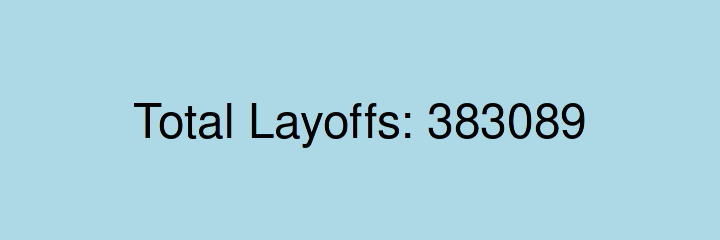

In [11]:
options(repr.plot.width = 6, repr.plot.height = 2)
Yearly_Layoffs %>%
  summarise(total_layoffs = sum(total_laid_off))%>%
  ggplot(aes(x = 1, y = 1)) +
  geom_text(aes(label = paste0("Total Layoffs: ", total_layoffs)), size = 10) +
  theme_void() +
  theme(plot.background = element_rect(fill = "lightblue", color = NA),
        panel.background = element_blank(),
        plot.margin = margin(20, 20, 20, 20))

#### 2020 Layoffs

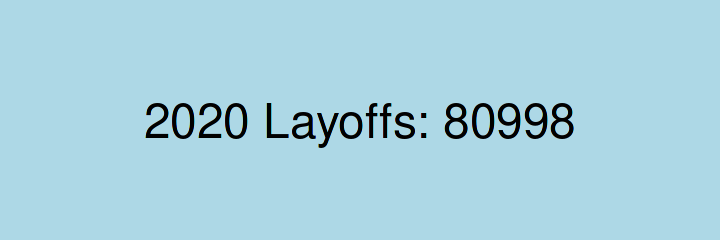

In [12]:
options(repr.plot.width = 6, repr.plot.height = 2)
Yearly_Layoffs %>%
  group_by(year) %>%
  filter(year == 2020) %>%
  summarise(total_layoffs = sum(total_laid_off))%>%
  ggplot(aes(x = 1, y = 1)) +
  geom_text(aes(label = paste0("2020 Layoffs: ", total_layoffs)), size = 10) +
  theme_void() +
  theme(plot.background = element_rect(fill = "lightblue", color = NA),
        panel.background = element_blank(),
        plot.margin = margin(20, 20, 20, 20))

#### 2021 Layoffs

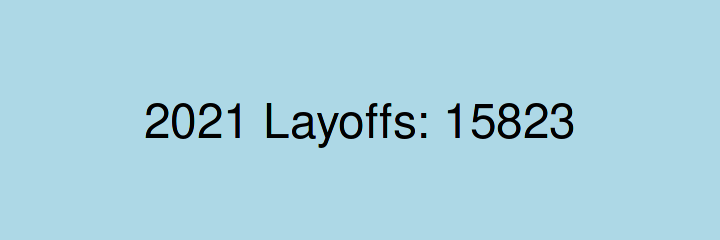

In [13]:
options(repr.plot.width = 6, repr.plot.height = 2)
Yearly_Layoffs %>%
  group_by(year) %>%
  filter(year == 2021) %>%
  summarise(total_layoffs = sum(total_laid_off))%>%
  ggplot(aes(x = 1, y = 1)) +
  geom_text(aes(label = paste0("2021 Layoffs: ", total_layoffs)), size = 10) +
  theme_void() +
  theme(plot.background = element_rect(fill = "lightblue", color = NA),
        panel.background = element_blank(),
        plot.margin = margin(20, 20, 20, 20))

#### 2022 Layoffs

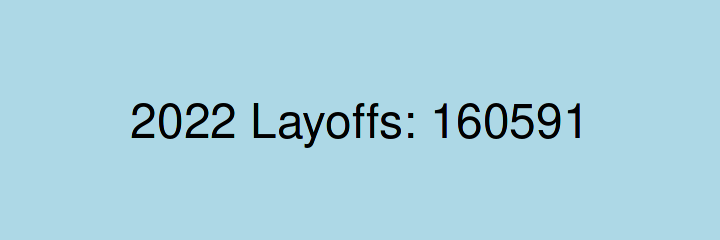

In [14]:
options(repr.plot.width = 6, repr.plot.height = 2)
Yearly_Layoffs %>%
  group_by(year) %>%
  filter(year == 2022) %>%
  summarise(total_layoffs = sum(total_laid_off))%>%
  ggplot(aes(x = 1, y = 1)) +
  geom_text(aes(label = paste0("2022 Layoffs: ", total_layoffs)), size = 10) +
  theme_void() +
  theme(plot.background = element_rect(fill = "lightblue", color = NA),
        panel.background = element_blank(),
        plot.margin = margin(20, 20, 20, 20))

#### 2023 Layoffs

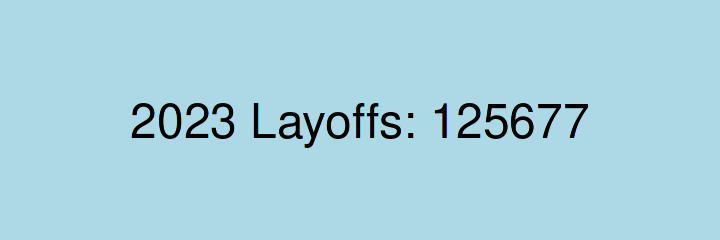

In [15]:
options(repr.plot.width = 6, repr.plot.height = 2)
Yearly_Layoffs %>%
  group_by(year) %>%
  filter(year == 2023) %>%
  summarise(total_layoffs = sum(total_laid_off))%>%
  ggplot(aes(x = 1, y = 1)) +
  geom_text(aes(label = paste0("2023 Layoffs: ", total_layoffs)), size = 10) +
  theme_void() +
  theme(plot.background = element_rect(fill = "lightblue", color = NA),
        panel.background = element_blank(),
        plot.margin = margin(20, 20, 20, 20))

### Line Graph

#### Yearly Monthly Layoffs

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


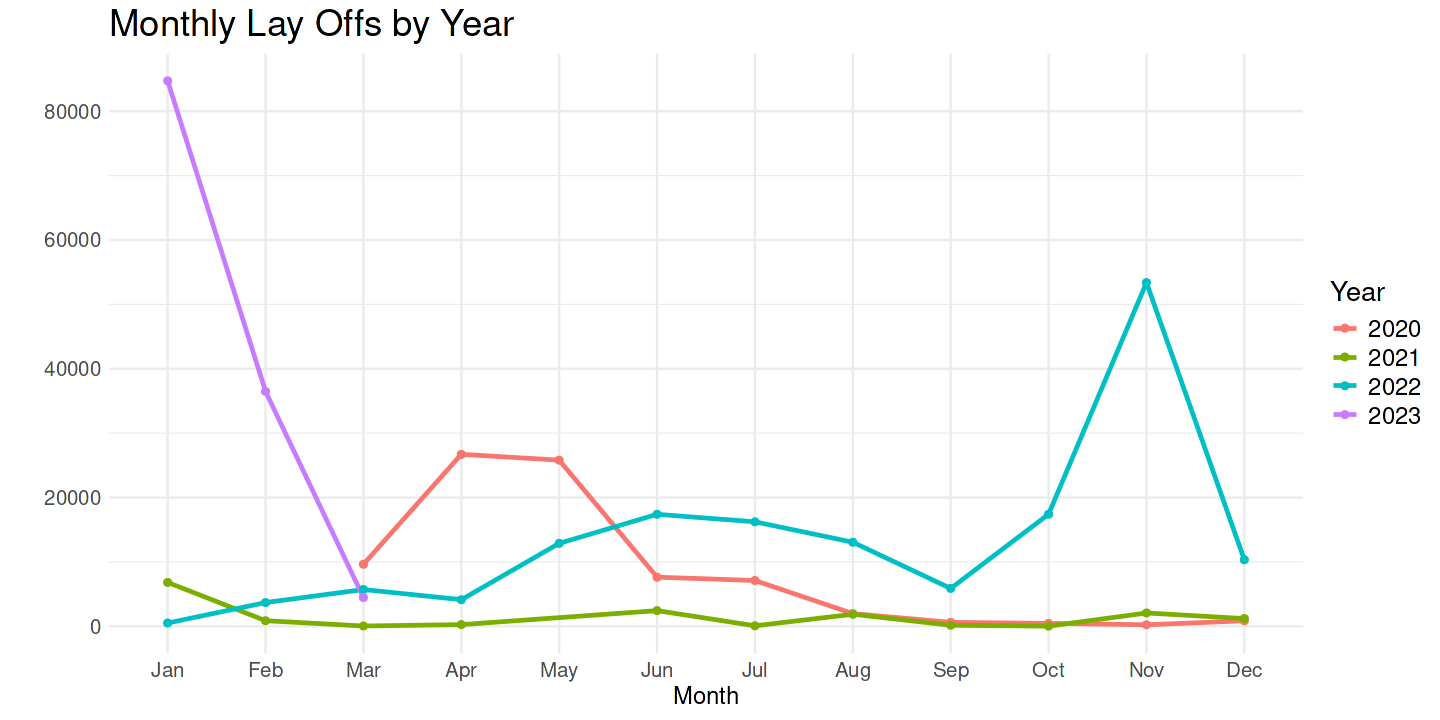

In [16]:
options(repr.plot.width = 12, repr.plot.height = 6)
Yearly_Layoffs %>%
  mutate(year = year(date),
         month = month(date, label = TRUE, abbr = TRUE)) %>%
  group_by(year, month) %>%
  summarise(total_layoffs = sum(total_laid_off), .groups = "drop") %>%
  ggplot(aes(x = month, y = total_layoffs, group = year, color = factor(year))) +
  geom_line(size = 1) +
  geom_point() +
  labs(
    title = "Monthly Lay Offs by Year",
    x = "Month",
    y = "",
    color = "Year") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 12),
       axis.text.y = element_text(size = 12),
       axis.title.x = element_text(size = 14),
       legend.text = element_text(size = 14),
       legend.title = element_text(size = 16),
       title = element_text(size = 18))

### Bar Graph

#### Yearly Layoffs

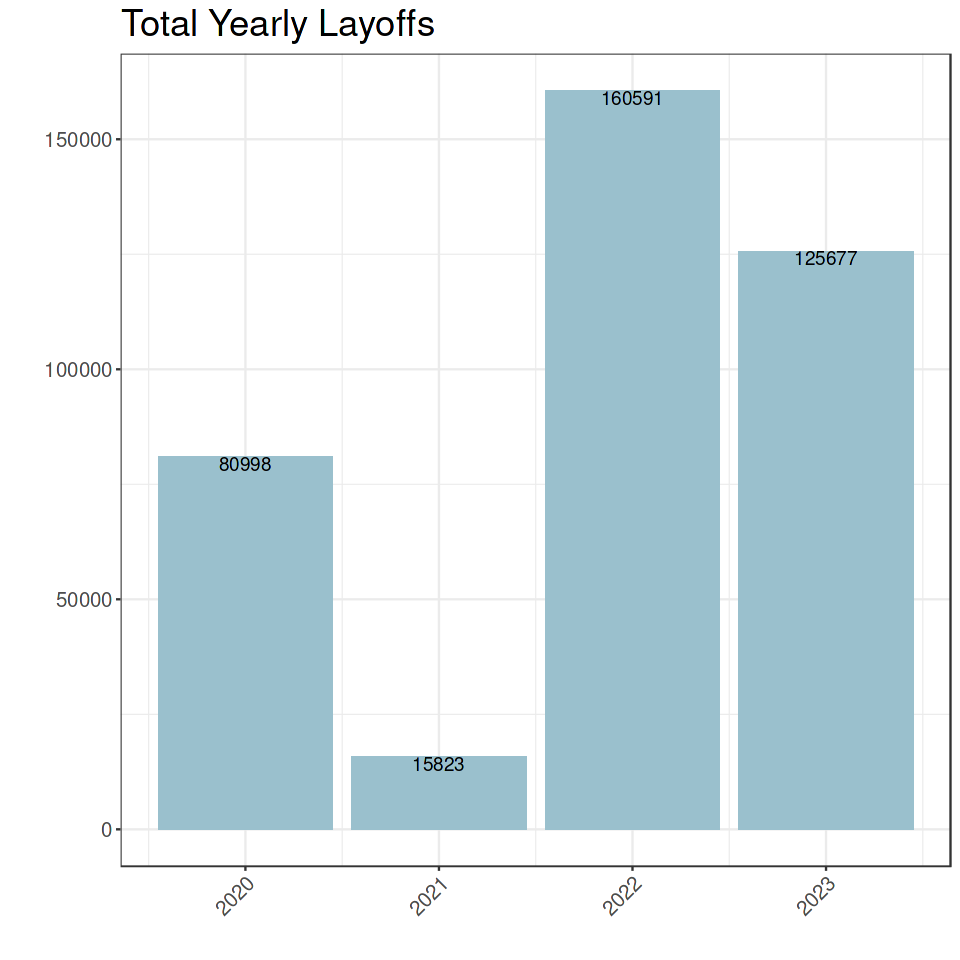

In [17]:
options(repr.plot.width = 8, repr.plot.height = 8)
Yearly_Layoffs %>%
  mutate(year = year(date),
         month = month(date, label = TRUE, abbr = TRUE)) %>%
  group_by(year) %>%
  summarise(total_layoffs = sum(total_laid_off), .groups = "drop") %>%
  ggplot(aes(y = total_layoffs, x = year))+
  geom_bar(stat = "identity", fill= "lightblue3")+
  geom_text(aes(label = total_layoffs),
            vjust = 1,         
            color = "black")+
  theme_bw()+
  theme(axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
       axis.text.y = element_text(size = 12),
       axis.title.x = element_text(size = 14),
       legend.text = element_text(size = 14),
       title = element_text(size = 18)) +
  labs(y = "",
       x = "",
       title = "Total Yearly Layoffs")

### Horizontal Bar Graph

#### Top 10 Company Layoffs

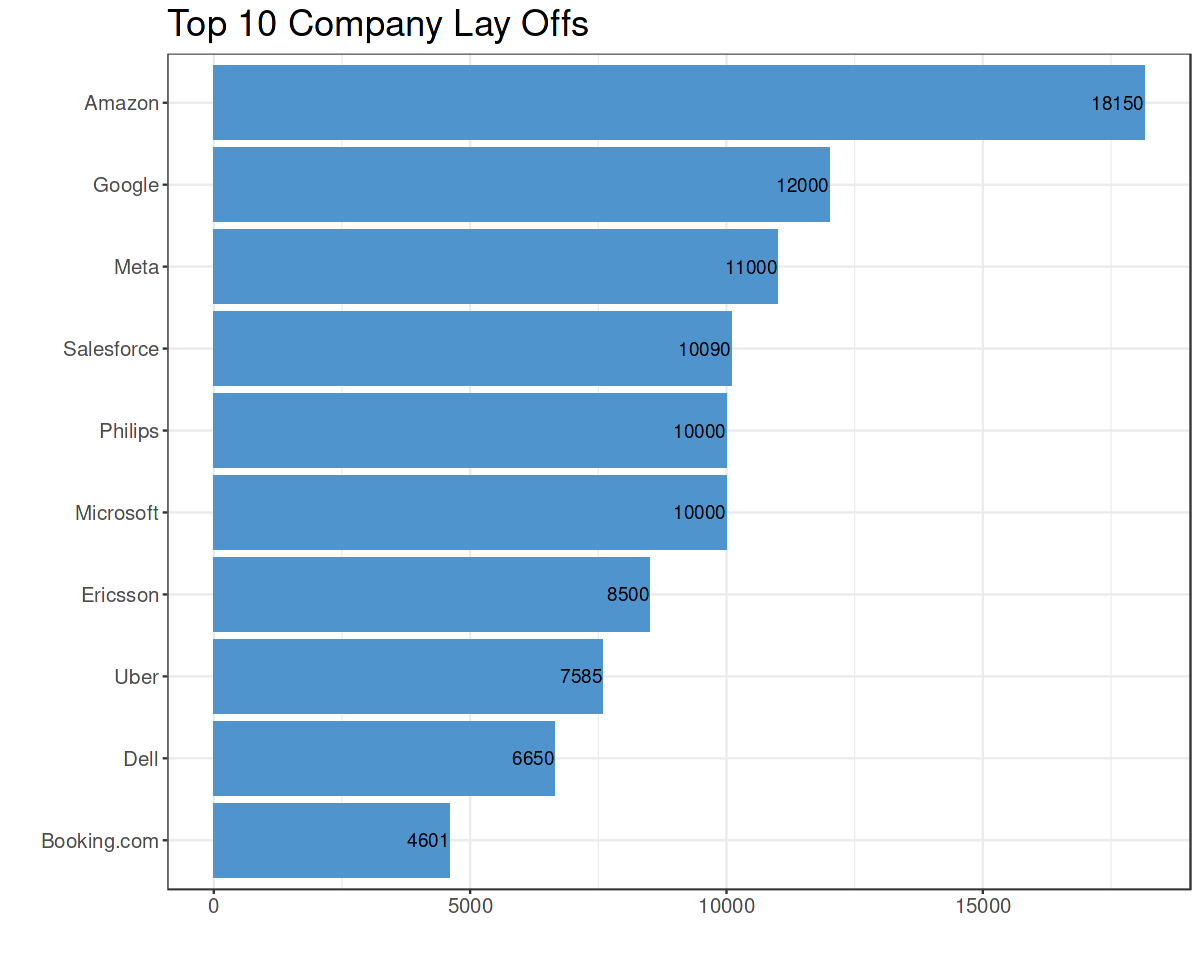

In [18]:
options(repr.plot.width = 10, repr.plot.height = 8)
Company_Layoffs %>%
group_by(company) %>%
  summarise(total_layoffs = sum(total_laid_off))%>%
  slice_max(n = 10, order_by = total_layoffs) %>%
  ggplot(aes(y = reorder(company, total_layoffs), x = total_layoffs))+
  geom_bar(stat = "identity",
           fill = "steelblue3")+
  geom_text(aes(label = total_layoffs),
            hjust = 1,
            color = "black")+
  theme_bw()+
  theme(axis.text.x = element_text(size = 12),
       axis.text.y = element_text(size = 12),
       title = element_text(size = 18)) +
  labs(x = "",
       y = "",
       title = "Top 10 Company Lay Offs")

#### Count of Companies above the Average Layoff

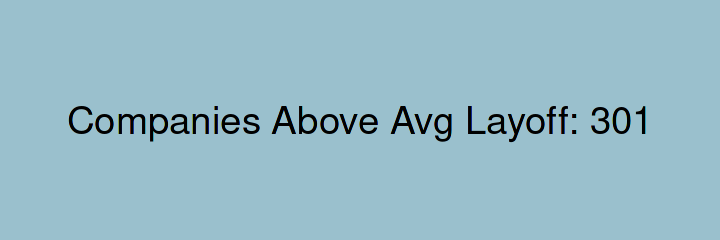

In [19]:
options(repr.plot.width = 6, repr.plot.height = 2)
Company_Layoffs %>%
  filter(total_laid_off > mean(total_laid_off)) %>%
  summarise(above_avg = n()) %>%
  ggplot(aes(x = 1, y = 1)) +
  geom_text(aes(label = paste0("Companies Above Avg Layoff: ", above_avg)), size = 8) +
  theme_void() +
  theme(plot.background = element_rect(fill = "lightblue3", color = NA),
        panel.background = element_blank(),
        plot.margin = margin(20, 20, 20, 20))

### Pie Chart

#### Top 10 Industry Layoffs

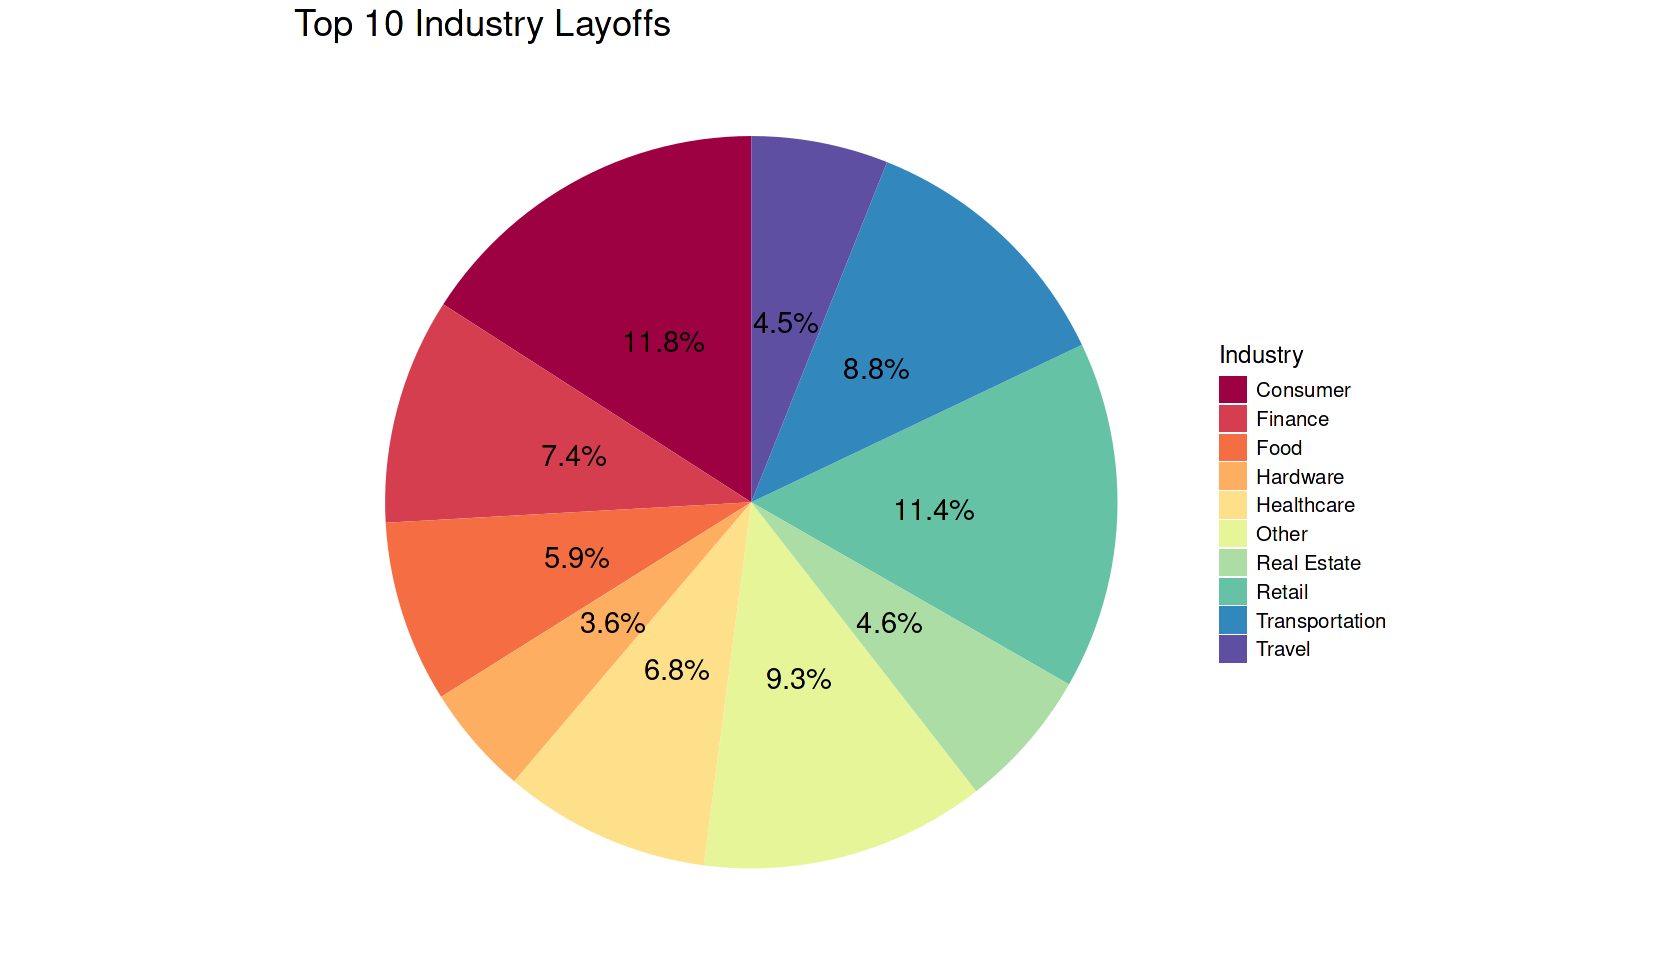

In [20]:
options(repr.plot.width = 14, repr.plot.height = 8)
Industry_Layoffs %>%
  group_by(industry) %>%
  summarise(total_layoffs = sum(total_laid_off)) %>%
  arrange(desc(total_layoffs))%>%
  mutate(percentage = round(total_layoffs / sum(total_layoffs) * 100, 1)) %>%
  slice_max(n = 10, order_by = total_layoffs) %>%
  ggplot(aes(x = "", y = total_layoffs, fill = industry))+
  geom_bar(stat = "identity", width = 1)+
  coord_polar(theta = "y")+
  geom_text(aes(label = paste0(percentage, "%")),
            position = position_stack(vjust = 0.5),
            size = 6)+
  theme_void()+
  theme(title = element_text(size = 18),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)) +
  scale_fill_brewer("Industry", palette = "Spectral")+
  labs(title = "Top 10 Industry Layoffs", x = "Industries",
       y = "Laid Off")

### Bar Graph

#### Top 10 Country Layoffs

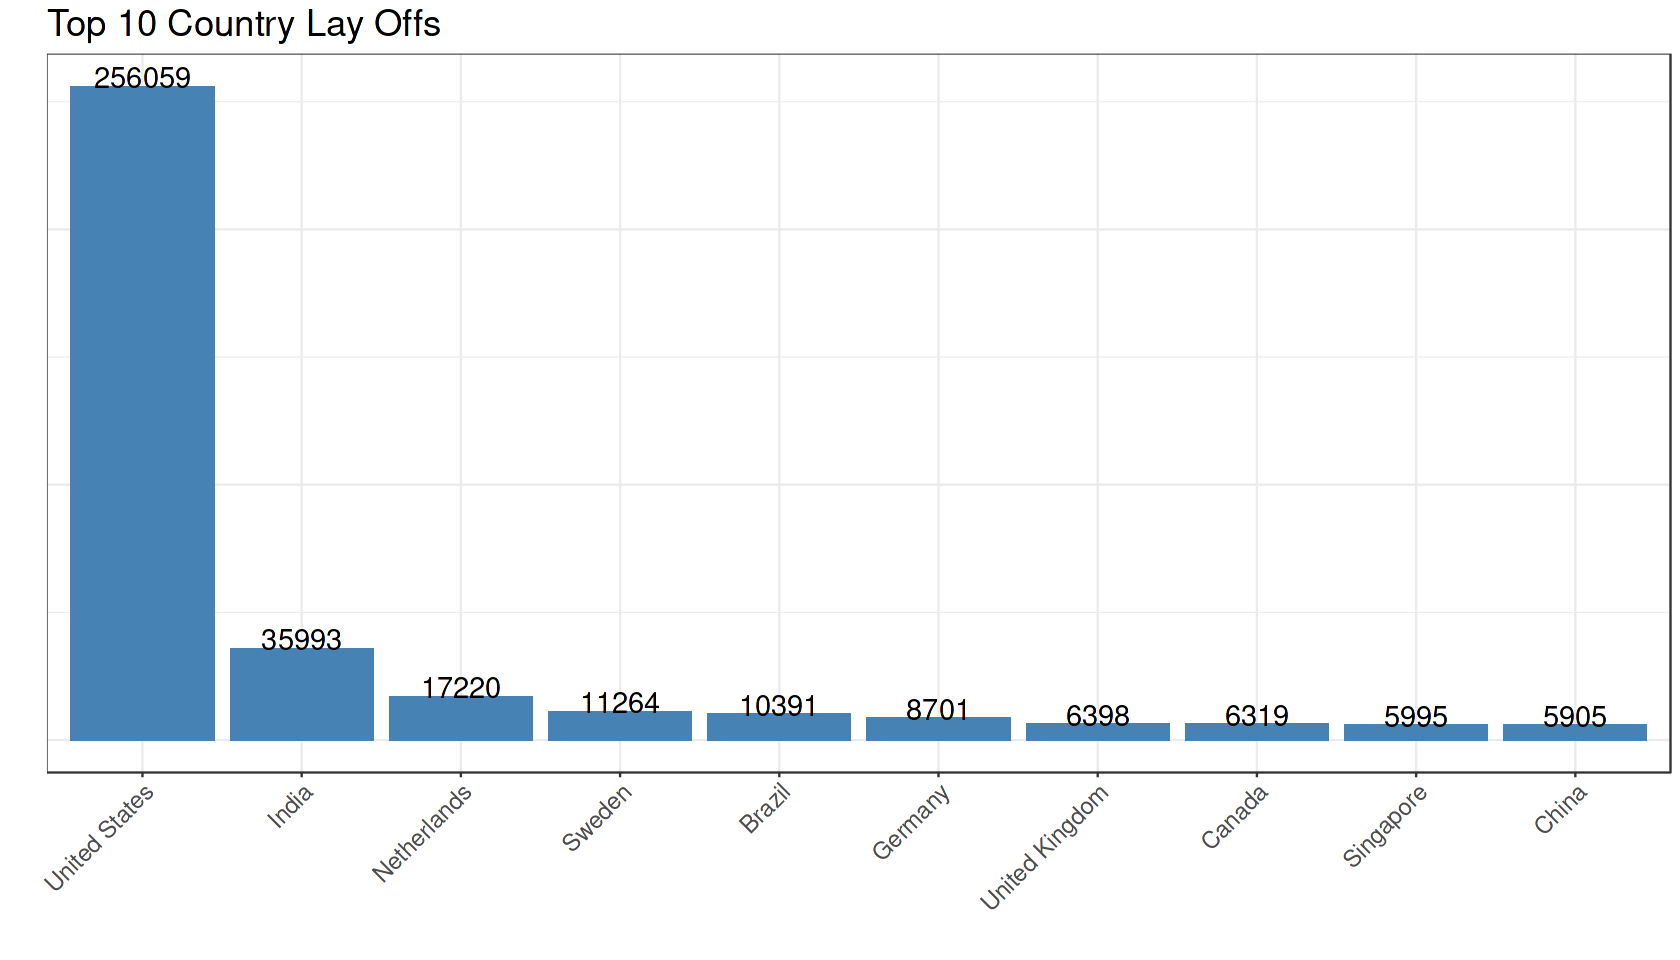

In [21]:
options(repr.plot.width = 14, repr.plot.height = 8)
Country_Layoffs %>%
  group_by(country) %>%
  summarise(total_layoffs = sum(total_laid_off)) %>%
  arrange(desc(total_layoffs)) %>%
  slice_max(n = 10, order_by = total_layoffs) %>%
  ggplot(aes(y = total_layoffs, x = reorder(country, -total_layoffs)))+
  geom_bar(stat = "identity", fill= "steelblue")+
  geom_text(aes(label = total_layoffs),
            vjust = 0.1,         
            color = "black",
            size = 6)+
  theme_bw()+
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        title = element_text(size = 18))+
  labs(y = "",
       x = "",
       title = "Top 10 Country Lay Offs")

#### Top 10 Country Average Layoffs

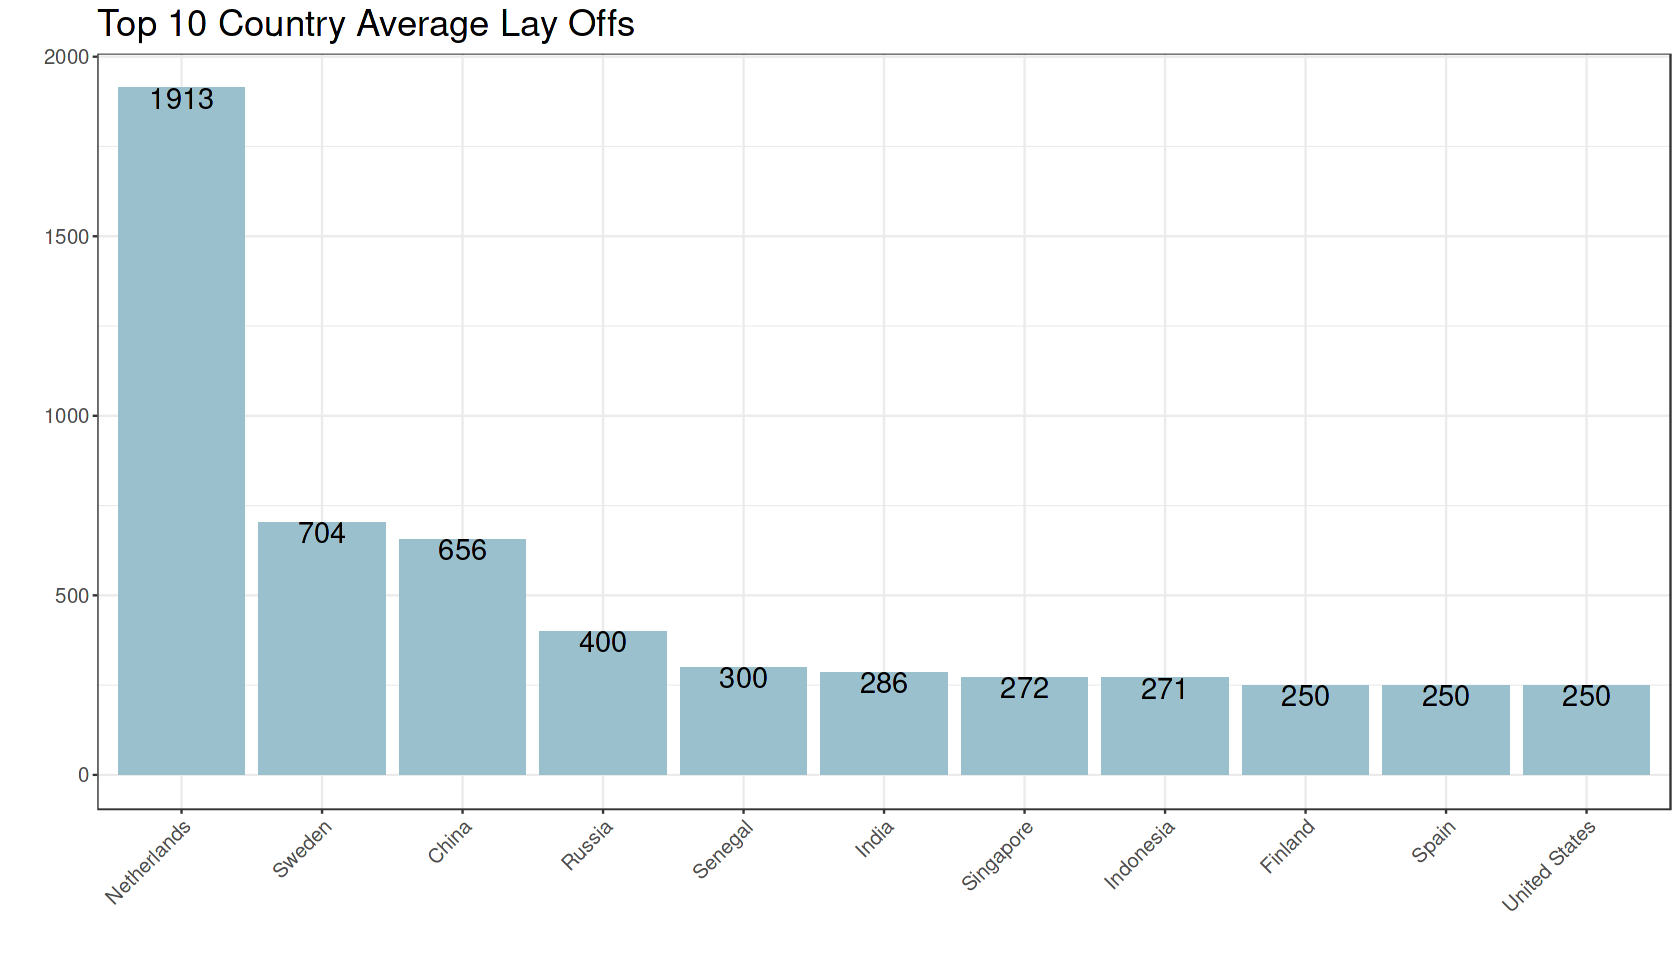

In [22]:
options(repr.plot.width = 14, repr.plot.height = 8)
Country_Layoffs %>%
  group_by(country) %>%
  summarise(average_layoff = round(mean(total_laid_off))) %>%
  arrange(desc(average_layoff)) %>%
  slice_max(n = 10, order_by = average_layoff) %>%
  ggplot(aes(y = average_layoff, x = reorder(country, -average_layoff)))+
  geom_bar(stat = "identity", fill= "lightblue3")+
  geom_text(aes(label = average_layoff),
            vjust = 1,         
            color = "black",
            size = 6)+
  theme_bw()+
  theme(axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 12),
        title = element_text(size = 18))+
  labs(y = "",
       x = "",
       title = "Top 10 Country Average Lay Offs")

#### Top 10 City Layoffs

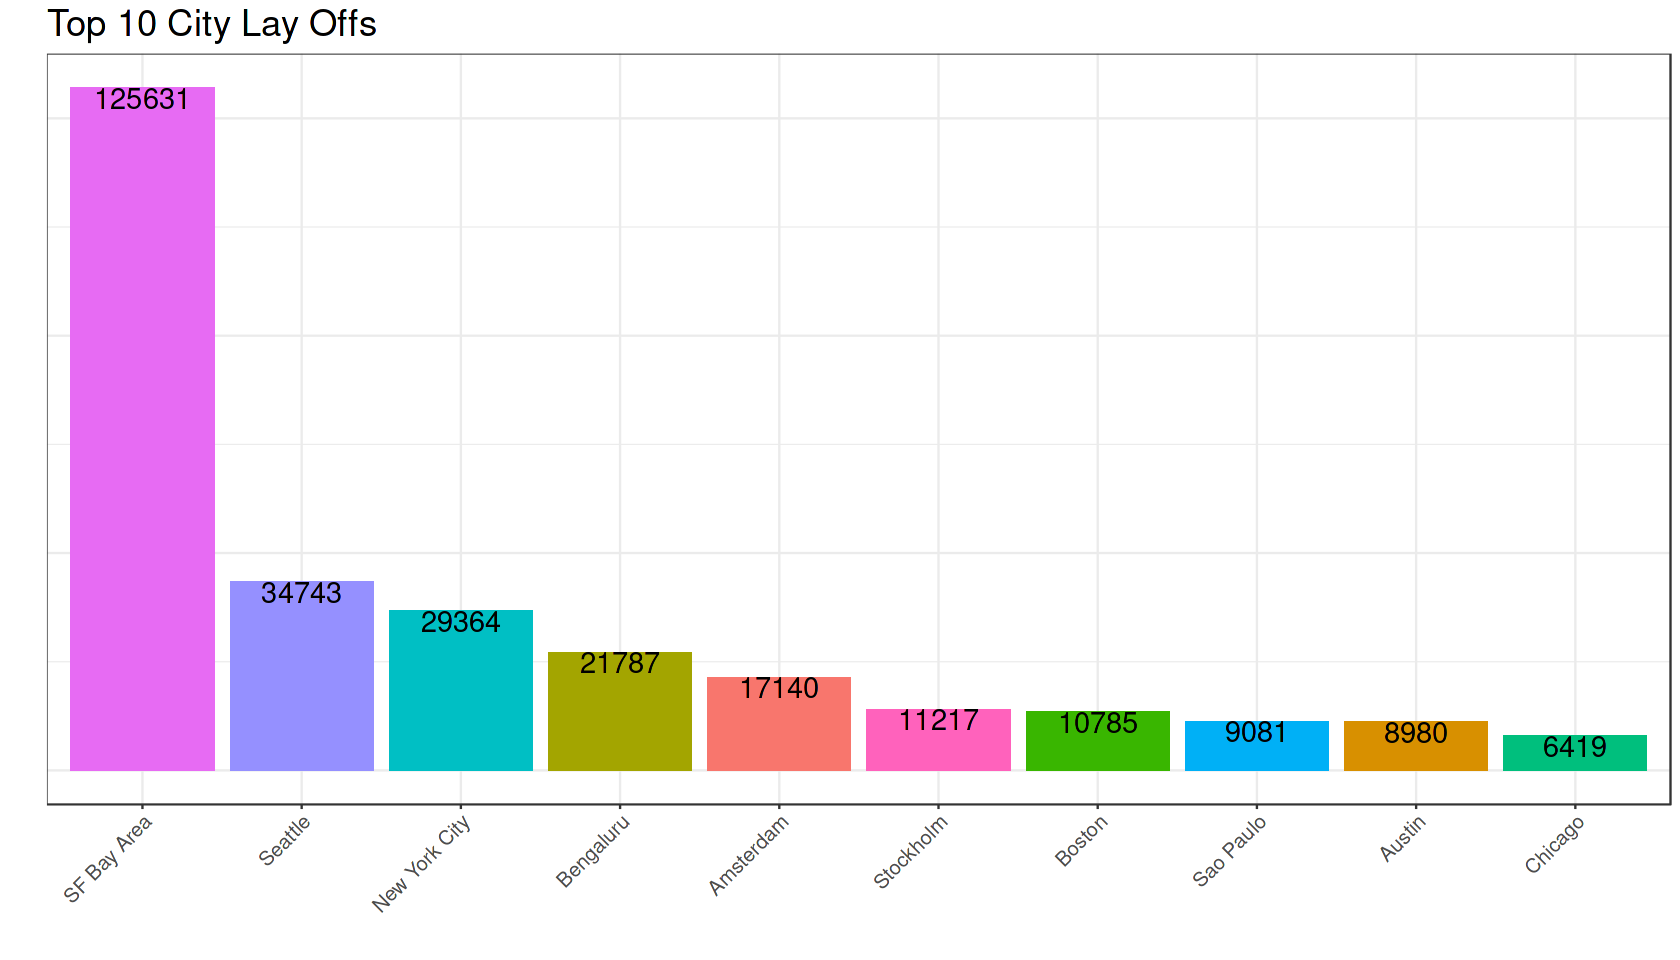

In [23]:
options(repr.plot.width = 14, repr.plot.height = 8)
City_Layoffs %>%
  group_by(location) %>%
  summarise(total_layoffs = sum(total_laid_off)) %>%
  arrange(desc(total_layoffs)) %>%
  slice_max(n = 10, order_by = total_layoffs) %>%
  ggplot(aes(y = total_layoffs, x = reorder(location, -total_layoffs),
             fill = location))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = total_layoffs),
            vjust = 1,
            color = "black",
            size = 6)+
  theme_bw()+
  theme(axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        title = element_text(size = 18),
        legend.position = "none")+
  labs(y = "",
       x = "",
       title = "Top 10 City Lay Offs")

#### Top 10 City Average Layoffs

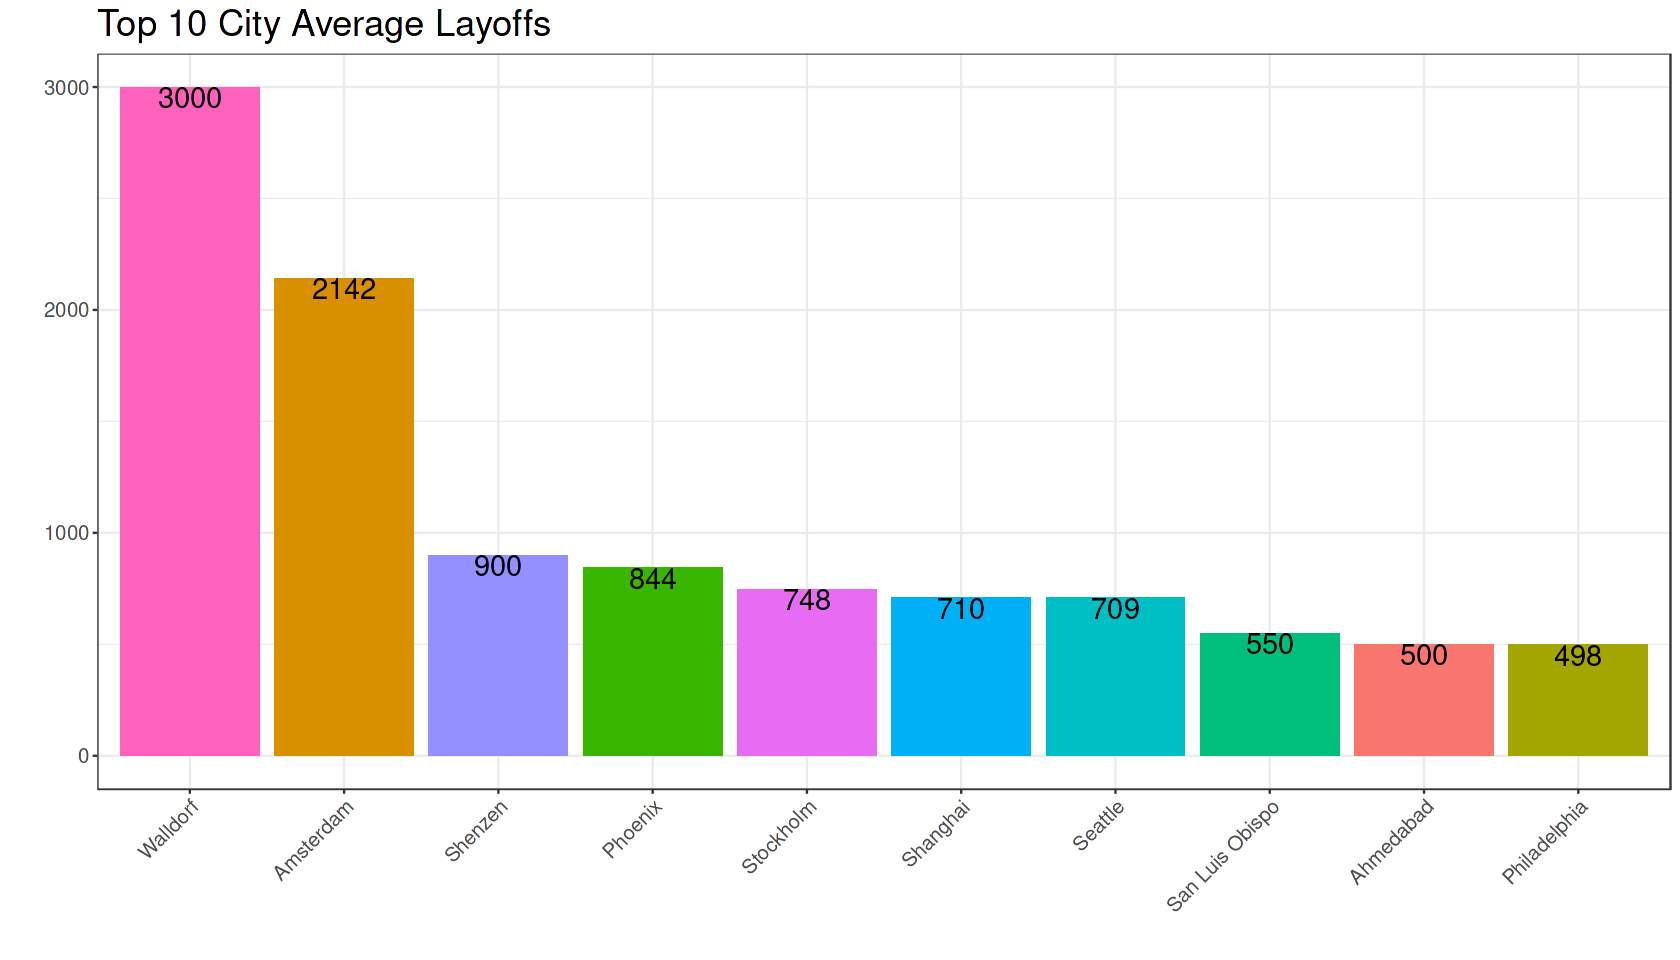

In [24]:
options(repr.plot.width = 14, repr.plot.height = 8)
City_Layoffs %>%
  group_by(location) %>%
  summarise(average_layoffs = round(mean(total_laid_off))) %>%
  arrange(desc(average_layoffs)) %>%
  slice_max(n = 10, order_by = average_layoffs) %>%
  ggplot(aes(y = average_layoffs, x = reorder(location, -average_layoffs),
             fill = location))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = average_layoffs),
            vjust = 1,
            color = "black",
            size = 6)+
  theme_bw()+
  theme(axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 12),
        title = element_text(size = 18),
        legend.position = "none")+
  labs(y = "",
       x = "",
       title = "Top 10 City Average Layoffs")